<a href="https://colab.research.google.com/github/Deeruth/Customer-Life-time-Value/blob/main/Movie_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PREDICT MOVIE LICENCING**

|**INNOVATION TEAM**| |
|:---|:---|
|**TEAM MEMBER** | **ELIJAH UDOH,KOLADE, EMMANUAL**  |
|**DEPARTMENT**  | **DATA MANAGEMENT**         |
|**PROJECT**     | **PREDICT MOVIE LICENCING** |

### **PROJECT**

#### **1.INTRODUCTION**


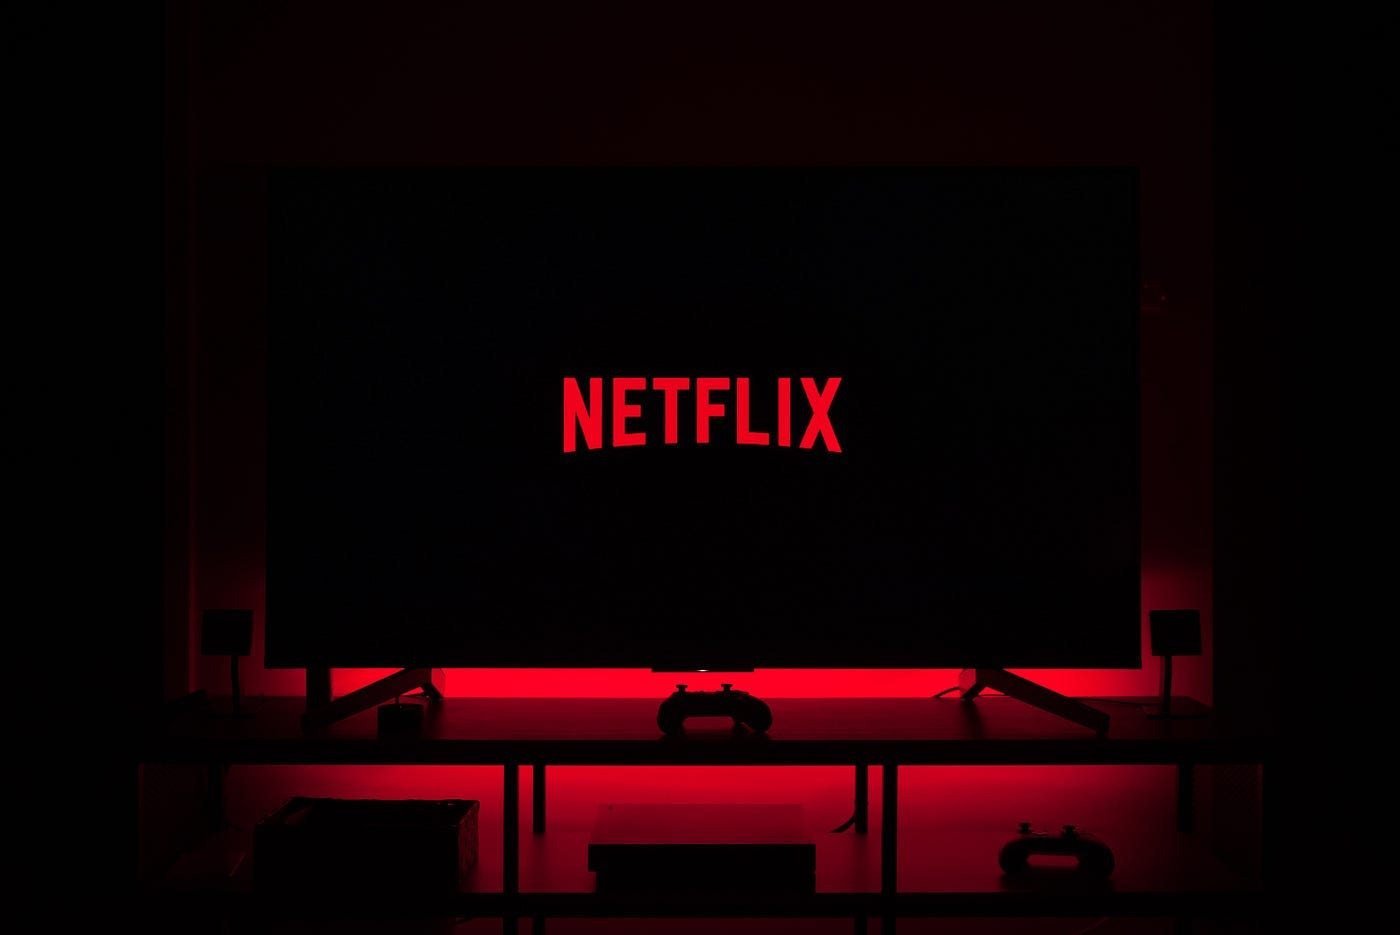

### **Approach**
- **Data Collection**
- **Data Cleaning and Preprocessing:** Handling missing values, encoding categorical features, and transforming date columns for better analysis.

- **Data Exploration and Visualization:** Understanding the data distribution, identifying missing values, and visualizing key features.

- **Feature Engineering:** Creating new features that can provide additional insights, such as extracting the year from release dates.
- **Model Building and Evaluation:** Using machine learning algorithms to build a predictive model. Evaluating its performance using accuracy and other relevant metrics.

- **Feature Importance Visualization:** Identifying and visualizing the most important features influencing the revenue category.
- **Making Predictions:** Applying the trained model to the test data and preparing the submission file for Watch-It's management.

### **Deliverables**
- **A well-documented Jupyter notebook with clear explanations, and visualizations.**
- **A submission file (submissions.csv) containing movie titles and their predicted revenue categories (High/Low)., zip file containing pdf file and jupyter notebook**



#***2. Load and Explore your Data***
### **2.1 Import important Libraries**
#### **We will start by importing libraries for data analaysis and visualization**

In [2]:
# import All libraries

# for Data cleaning
import numpy as np
import pandas as pd

# for data viz
import matplotlib.pyplot as plt
import seaborn as sns

# for daa splitting
from sklearn.model_selection import train_test_split

# for Data Scaling
from sklearn.preprocessing import StandardScaler

# for machine learning model
from sklearn.ensemble import RandomForestClassifier

# For Evaluation of the performance of the model for classification type and many
from sklearn.metrics import accuracy_score, classification_report, pair_confusion_matrix

# Set Plot Style
sns.set(style = 'whitegrid')

##### Importing libraries to provide tools for data manipulation. visualization and ML

### **2.2 Load Data**

In [3]:
# Load the datasets

train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")




In [6]:
# Explore dataset
train_data.head(2)

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,...,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination,revenue_category
0,Pooh's Heffalump Movie,USA,"Animation, Comedy, Family, Fantasy, Musical, M...",English,3.0,True,G,11-Feb-05,68 min,24-May-05,...,NaN,NaN,NaN,6.4/10,80%,64/100,0,0,1,High
1,Yeh Jawaani Hai Deewani,India,"Comedy, Drama, Musical, Romance","Hindi, English, French",2.0,True,Not Rated,31-May-13,160 min,15-Jul-13,...,124.0,127528.0,12.0,7.1/10,67%,0,0,22,92,Low


In [8]:
# Explore test dataset
test_data.head(2)

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,...,comments,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination
0,Delhi-6,India,"Comedy, Drama","Hindi, English",3.0,True,Not Rated,20-Feb-09,141 min,16-Jun-09,...,7.0,43.0,165008.0,13.0,6.0/10,40%,45/100,0,2,7
1,Before I Disappear,"USA, UK",Drama,English,1.0,False,Unrated,28-Nov-14,93 min,19-May-15,...,NaN,NaN,NaN,NaN,7.2/10,38%,47/100,0,16,8


In [9]:
# columns in train date
train_data.columns

Index(['title', 'country', 'genres', 'language', 'writer_count',
       'title_adaption', 'censor_rating', 'release_date', 'runtime',
       'dvd_release_date', 'users_votes', 'comments', 'likes', 'overall_views',
       'dislikes', 'ratings_imdb', 'ratings_tomatoes', 'ratings_metacritic',
       'special_award', 'awards_win', 'awards_nomination', 'revenue_category'],
      dtype='object')

In [13]:
# check for unique countries
train_data['country'].value_counts()

,count
country,
USA,1185
France,62
UK,62
"USA, Germany",54
"UK, USA",52
...,...
"Italy, Austria",1
"USA, Mexico, Germany",1
"USA, Sweden, Netherlands, Australia, Finland, Denmark",1


### **2.3 DATA OVERVIEW**

In [15]:
# Check data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               2398 non-null   object 
 1   country             2400 non-null   object 
 2   genres              2400 non-null   object 
 3   language            2395 non-null   object 
 4   writer_count        2306 non-null   float64
 5   title_adaption      2400 non-null   bool   
 6   censor_rating       2362 non-null   object 
 7   release_date        2396 non-null   object 
 8   runtime             2400 non-null   object 
 9   dvd_release_date    2331 non-null   object 
 10  users_votes         2400 non-null   object 
 11  comments            1974 non-null   float64
 12  likes               1956 non-null   float64
 13  overall_views       2083 non-null   float64
 14  dislikes            1956 non-null   float64
 15  ratings_imdb        2400 non-null   object 
 16  rating

In [17]:
# check for null values
train_data.isnull()

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,...,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination,revenue_category
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# Check for missing values
train_data.isnull().sum()

,0
title,2
country,0
genres,0
language,5
writer_count,94
title_adaption,0
censor_rating,38
release_date,4
runtime,0
dvd_release_date,69


In [18]:
# Check information of the test data
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               600 non-null    object 
 1   country             600 non-null    object 
 2   genres              600 non-null    object 
 3   language            600 non-null    object 
 4   writer_count        571 non-null    float64
 5   title_adaption      600 non-null    bool   
 6   censor_rating       584 non-null    object 
 7   release_date        598 non-null    object 
 8   runtime             600 non-null    object 
 9   dvd_release_date    582 non-null    object 
 10  users_votes         600 non-null    object 
 11  comments            476 non-null    float64
 12  likes               477 non-null    float64
 13  overall_views       507 non-null    float64
 14  dislikes            477 non-null    float64
 15  ratings_imdb        600 non-null    object 
 16  ratings_

In [19]:
# check missing values of test data
test_data.isnull().sum()


,0
title,0
country,0
genres,0
language,0
writer_count,29
title_adaption,0
censor_rating,16
release_date,2
runtime,0
dvd_release_date,18


**The test dataset comprises 600 entries with most columns complete. Notable exceptions include writer_count, censor_rating, release_date, and dvd_release_date, which have some missing values. Additionally, several user engagement metrics (comments, likes, overall_views, dislikes) also have missing data. Addressing these gaps is essential for accurate analysis and predictions.**

### **3. DATA PREPROCESSING**

####**3.1 Handling Missing Values**

**We address missing values by filling them with appropriate statistical measures (median for numerical features, mode for categorical features) to maintain data integrity.**

In [24]:
# Fill missing values for numerical columns with median in test and train dataset

for column in ['writer_count', 'likes', 'dislikes','comments', 'overall_views']:
  median = train_data[column].median()
  train_data[column].fillna(median, inplace = True)
  test_data[column].fillna(median, inplace = True)

For classification dataset, don't use zeor as it will clash the 0 and 1 in the data. Median should work for numerical columns but mean is good also for when the data in the column are distributed.

Mode is better categorical columns and interpolation is better for time series data

Dropping missing values is also not right for large missing value as it makes the predict overfit


In [25]:
test_data.head()

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,...,comments,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination
0,Delhi-6,India,"Comedy, Drama","Hindi, English",3.0,True,Not Rated,20-Feb-09,141 min,16-Jun-09,...,7.0,43.0,165008.0,13.0,6.0/10,40%,45/100,0,2,7
1,Before I Disappear,"USA, UK",Drama,English,1.0,False,Unrated,28-Nov-14,93 min,19-May-15,...,57.0,425.0,281652.0,30.0,7.2/10,38%,47/100,0,16,8
2,"Good Year, A","USA, UK","Comedy, Drama, Romance","English, French, Russian",2.0,True,PG-13,10-Nov-06,117 min,27-Feb-07,...,14.0,276.0,187788.0,17.0,7.0/10,25%,47/100,0,1,2
3,Brüno,"USA, UK",Comedy,"English, German",9.0,True,R,10-Jul-09,81 min,17-Nov-09,...,81.0,301.0,200324.0,43.0,5.8/10,67%,54/100,0,2,5
4,How to Lose a Guy in 10 Days,"USA, Germany","Comedy, Romance",English,5.0,True,PG-13,07-Feb-03,116 min,01-Jul-03,...,74.0,480.0,740345.0,23.0,6.4/10,42%,45/100,0,1,8
